In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,"/home/albert/Work/git/cmclimate")
import cmclimate
import os
%matplotlib inline
matplotlib.rcParams['figure.figsize']= (20, 8)
matplotlib.rcParams['xtick.labelsize']= 22
matplotlib.rcParams['ytick.labelsize']= 22
matplotlib.rcParams['axes.labelsize']= 22
matplotlib.rcParams.update({'font.size': 22})

import sys
sys.path.insert(0,"/home/albert/lib/python")
import numpy as np
import xarray as xr
import GriddedData
import time
import numpy.ma as ma
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

sys.path.insert(0,'/home/albert//Work/git/CMEMS-diags/')
from natl60_3_5_by_5_boxes import boxes
sys.path.insert(0,'/home/albert/lib/python/AJ-spectre/')
import plot_box as pb


In [2]:
ds_hgradT_JFM=xr.open_dataset('/mnt/albert/equipes/meom/workdir/albert/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_year_hgradT_filt10km_bin1x1.nc')
ds_hgradS_JFM=xr.open_dataset('/mnt/albert/equipes/meom/workdir/albert/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_year_hgradS_filt10km_bin1x1.nc')
ds_hgradb_JFM=xr.open_dataset('/mnt/albert/equipes/meom/workdir/albert/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_year_hgradb_filt10km_bin1x1.nc')


In [3]:
hgradT_JFM=ds_hgradT_JFM['vohgradb']
hgradS_JFM=ds_hgradS_JFM['vohgradb']
hgradb_JFM=ds_hgradb_JFM['vohgradb']


/home/albert/anaconda2/lib/python2.7/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


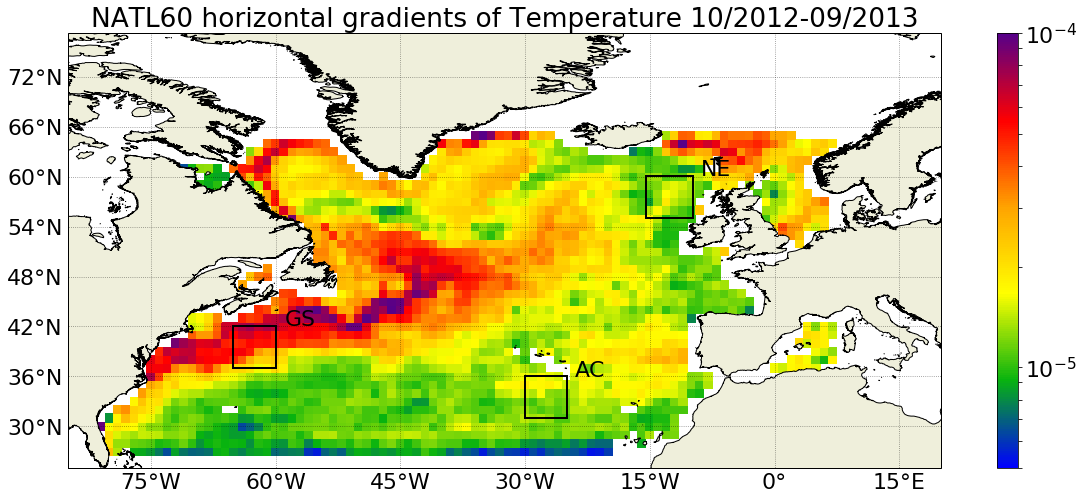

In [4]:
fig=plt.figure(figsize=(20,8))
data=ma.masked_invalid(ds_hgradT_JFM['vohgradb'])
lon=ds_hgradT_JFM['nav_lon']
lat=ds_hgradT_JFM['nav_lat']
#add_map(lon_min=-85, lon_max=20, lat_min=25, lat_max=70, scale='low')
norm=matplotlib.colors.LogNorm(vmin=5e-6, vmax=1e-4)

ax = plt.subplot(1, 1, 1,projection=ccrs.PlateCarree(central_longitude=0))
lon_min=-85
lon_max=20
lat_min=25
lat_max=70
extent=(lon_min, lon_max, lat_min, lat_max)
ax.set_extent((-85, 20, 25, 70))
land = cfeature.GSHHSFeature(scale='intermediate',
                                 levels=[1],
                                 facecolor=cfeature.COLORS['land'])
ax.add_feature(land)
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                      alpha=0.5)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.tick_params('both',labelsize=22)
plt.pcolormesh(lon,lat,data,cmap=cmclimate.cm.BlGrYeOrReVi200, norm=norm)
plt.colorbar()
plt.title('NATL60 horizontal gradients of Temperature 10/2012-09/2013')
for box in boxes:
    x1 = box.lonmin
    x2 = box.lonmax
    y1 = box.latmin
    y2 = box.latmax
    ax.plot([x1, x2], [y1, y1],color='black',linewidth=2)
    ax.plot([x1, x2], [y2, y2],color='black',linewidth=2)
    ax.plot([x1, x1], [y1, y2],color='black',linewidth=2)
    ax.plot([x2, x2], [y1, y2],color='black',linewidth=2)
    ax.text(x2+1,y2,box.name)
    

plt.savefig('NATL60_TSG_T_gradients_year_1x1_log.png', dpi=300, bbox_inches='tight')

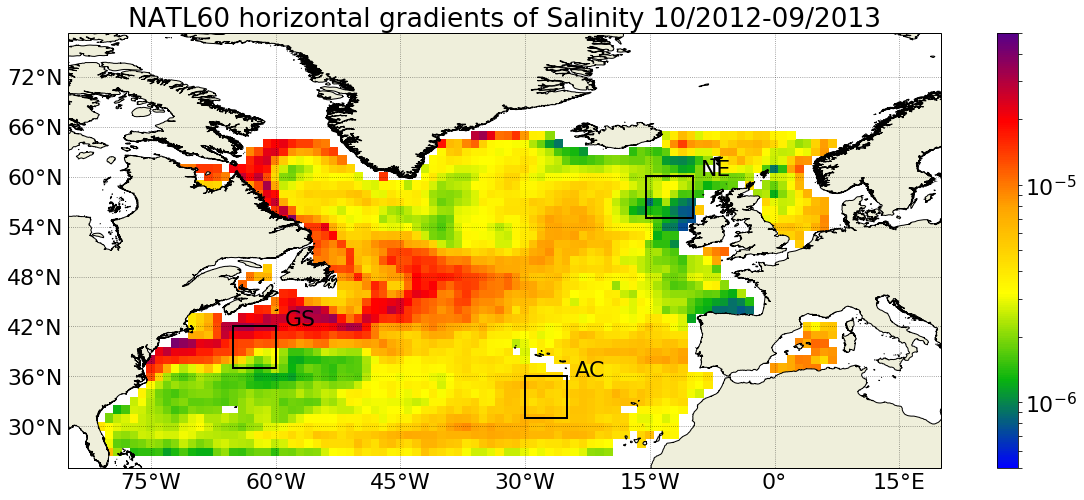

In [5]:
fig=plt.figure(figsize=(20,8))
data=ma.masked_invalid(ds_hgradS_JFM['vohgradb'])
lon=ds_hgradT_JFM['nav_lon']
lat=ds_hgradT_JFM['nav_lat']
#add_map(lon_min=-85, lon_max=20, lat_min=25, lat_max=70, scale='low')
norm=matplotlib.colors.LogNorm(vmin=5e-7, vmax=5e-5)

ax = plt.subplot(1, 1, 1,projection=ccrs.PlateCarree(central_longitude=0))
lon_min=-85
lon_max=20
lat_min=25
lat_max=70
extent=(lon_min, lon_max, lat_min, lat_max)
ax.set_extent((-85, 20, 25, 70))
land = cfeature.GSHHSFeature(scale='intermediate',
                                 levels=[1],
                                 facecolor=cfeature.COLORS['land'])
ax.add_feature(land)
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                      alpha=0.5)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.tick_params('both',labelsize=22)
for box in boxes:
    x1 = box.lonmin
    x2 = box.lonmax
    y1 = box.latmin
    y2 = box.latmax
    ax.plot([x1, x2], [y1, y1],color='black',linewidth=2)
    ax.plot([x1, x2], [y2, y2],color='black',linewidth=2)
    ax.plot([x1, x1], [y1, y2],color='black',linewidth=2)
    ax.plot([x2, x2], [y1, y2],color='black',linewidth=2)
    ax.text(x2+1,y2,box.name)
plt.pcolormesh(lon,lat,data,cmap=cmclimate.cm.BlGrYeOrReVi200, norm=norm)
plt.colorbar()
plt.title('NATL60 horizontal gradients of Salinity 10/2012-09/2013')
plt.savefig('NATL60_TSG_S_gradients_year_1x1_log.png', dpi=300, bbox_inches='tight')

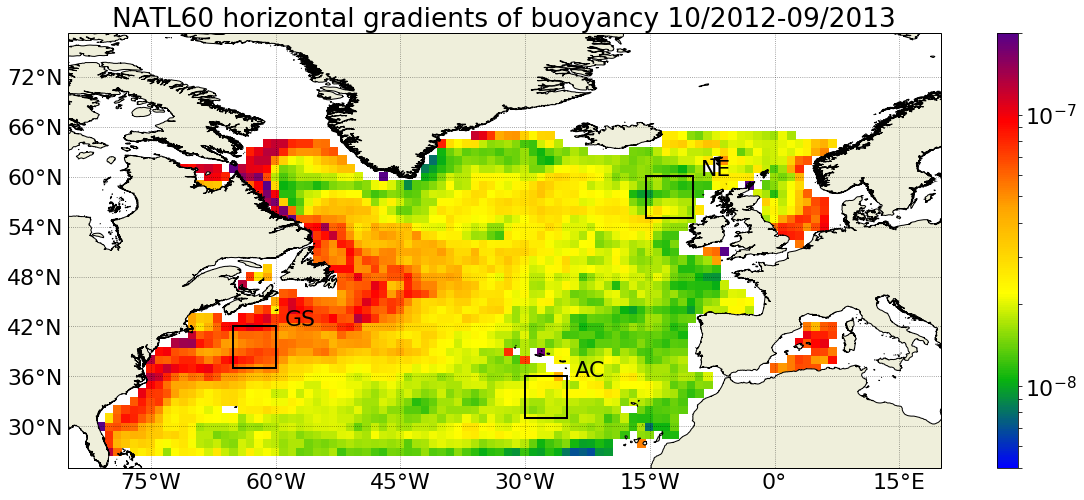

In [6]:
fig=plt.figure(figsize=(20,8))
data=ma.masked_invalid(ds_hgradb_JFM['vohgradb'])
lon=ds_hgradT_JFM['nav_lon']
lat=ds_hgradT_JFM['nav_lat']
#add_map(lon_min=-85, lon_max=20, lat_min=25, lat_max=70, scale='low')
norm=matplotlib.colors.LogNorm(vmin=5e-9, vmax=2e-7)

ax = plt.subplot(1, 1, 1,projection=ccrs.PlateCarree(central_longitude=0))
lon_min=-85
lon_max=20
lat_min=25
lat_max=70
extent=(lon_min, lon_max, lat_min, lat_max)
ax.set_extent((-85, 20, 25, 70))
land = cfeature.GSHHSFeature(scale='intermediate',
                                 levels=[1],
                                 facecolor=cfeature.COLORS['land'])
ax.add_feature(land)
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                      alpha=0.5)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.tick_params('both',labelsize=22)
plt.pcolormesh(lon,lat,data,cmap=cmclimate.cm.BlGrYeOrReVi200, norm=norm)
for box in boxes:
    x1 = box.lonmin
    x2 = box.lonmax
    y1 = box.latmin
    y2 = box.latmax
    ax.plot([x1, x2], [y1, y1],color='black',linewidth=2)
    ax.plot([x1, x2], [y2, y2],color='black',linewidth=2)
    ax.plot([x1, x1], [y1, y2],color='black',linewidth=2)
    ax.plot([x2, x2], [y1, y2],color='black',linewidth=2)
    ax.text(x2+1,y2,box.name)
plt.colorbar()
plt.title('NATL60 horizontal gradients of buoyancy 10/2012-09/2013')
plt.savefig('NATL60_TSG_b_gradients_year_1x1_log.png', dpi=300, bbox_inches='tight')

In [7]:
#!montage NATL60_TSG_T_gradients_year_1x1_log.png NATL60_TSG_S_gradients_year_1x1_log.png NATL60_TSG_b_gradients_year_1x1_log.png -geometry 2048x1024 -tile 1x3 -quality 100 TSG_yearNATL60_log.png
#!convert TSG_JFM_data-NATL60_log.png -trim -bordercolor White -border 20x10 +repage TSG_year_NATL60_log.png